In [1]:
# Import libraries, graphing programs, and programs for machine learning

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas import Series,DataFrame




In [2]:
# Locate test and training data for titanic

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

In [3]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Look at the information in the data file to see what type of data is in each column

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Lets do some quick correlations to see if it provides
# us any direction

# Here we see females had a higher survival rate
# over males

train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
# Coverting Sex into numerical values

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Here we see survival rate declines
# as number of Sibling/Spouses increases

train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
# Here we see the highest survival rate is 
# with 3 Parent/Child relations

# The second highest survival rate is
# with 1 Parent/Child relation

# This is something to explore futher

train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [9]:
# Looking at the training data to see a count of how much data is in each column 
# so we can identify the # of unique variables

# There is missing or duplicate data in Ticket and Cabin columns

train_df.describe(include=['O'])

,Name,Ticket,Cabin,Embarked
count,891,891,204,889
unique,891,681,147,3
top,"Graham, Mr. George Edward",CA. 2343,C23 C25 C27,S
freq,1,7,4,644


In [10]:
# Lets drop the Ticket and Cabin columns 
# as I am not sure how this data will be useful 
# in predicting survival

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 12), (418, 11), (891, 12), (418, 11))


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [11]:
# Since we are unable to use names in analyzing data
# we can retain the title feature to see if it can be
# useful in other ways

# Historically the title given to a person represented a
# variety of categories, such as age, economic status, sex, 
# or family relations

# We can use the titles to help fill in missing data, and
# check for correlations with fare, Pclass, SibSp, and Parch


for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [12]:
# We want to confirm that every passenger has a title
# so we don't miss anyone

train_df['Title'].isnull

<bound method Series.isnull of 0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object>

In [13]:
# Since there are many different titles
# we will replace some titles for more common titles
# Sir, Capt, and Col all represent a man of marrying age so we will group them under Mr
# Mlle, and Ms represent young girls and unmarried women so we will group them under Miss
# Countess, Mme, and Lady represent older married women and widows so we will group them under Mrs
# Don, Dr, Major, Rev, Jonkheer, and Dona do not delineate sex, age or family relation so we will group 
# them under Rare

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Don', 'Dr', 'Major', 'Rev',\
        'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Sir', 'Capt', 'Col'], 'Mr')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Mme', 'Lady'], 'Mrs')
    
# Lets look at survival rate by title

# Here we see that married women Mrs had the highest rate of survival
# Unmarried women/girls Miss had the second highest rate
# Boys of any age Master, had about a 50/50 chance of survival
# Men had the worst rate of survival

    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.159309
3,Mrs,0.796875
4,Rare,0.235294


In [14]:
# Converting titles into numeric values

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


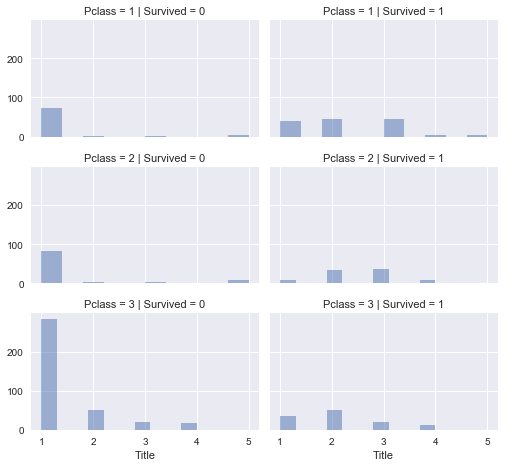

In [15]:
# Lets look at titles and how they relate to Pclass

# Here we see the survival rate for Mr increased with class
# There were no Rare titles in 3rd class and no rare titles survived in 2nd class
# Mr in 3rd class had the worst rate of survival and Mr in 1st class had the best rate of survival
# No Masters in 1st and 2nd class died

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Title', alpha=.5, bins=10) 
grid.add_legend();

In [16]:
# Now we can drop Name and PassengerID columns
# as I am not sure how this data will be useful 
# in predicting survival

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [17]:
# Lets see if there is a correlation between survival
# and passengers traveling alone vs passengers with family members

# Creating new column "FamilySize" for passenger with famimly on board
# Creating new column "IsAlone" for passengers with no family on board

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [18]:
for dataset in combine:
    dataset['IsAlone'] = 0
    train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1

In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,S,1,2,0
1,1,1,1,38.0,1,0,71.2833,C,3,2,0
2,1,3,1,26.0,0,0,7.9250,S,2,1,1
3,1,1,1,35.0,1,0,53.1000,S,3,2,0
4,0,3,0,35.0,0,0,8.0500,S,1,1,1


In [20]:
# Now we will drop the SibSp and Parch columns

train_df = train_df.drop(['SibSp','Parch'], axis=1)
test_df  = test_df.drop(['SibSp','Parch'], axis=1)
combine = [train_df, test_df]
train_df.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
886,0,2,0,27.0,13.00,S,5,1,1
887,1,1,1,19.0,30.00,S,2,1,1
888,0,3,1,NaN,23.45,S,2,4,0
889,1,1,0,26.0,30.00,C,1,1,1
890,0,3,0,32.0,7.75,Q,1,1,1


In [24]:
# Lets take a look at the quality of the data now
# Counting each column looking for missing data

train_df.count()

Survived      891
Pclass        891
Sex           891
Age           714
Fare          891
Embarked      889
Title         891
FamilySize    891
IsAlone       891
dtype: int64

In [25]:
# In the training data there are 86 passengers with titles
# but the age data is missing

train_df[train_df['Title'].notnull() & test_df['Age'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
10,1,3,1,4.0,16.7000,S,2,3,0
22,1,3,1,15.0,8.0292,Q,2,1,1
29,0,3,0,NaN,7.8958,S,1,1,1
33,0,2,0,66.0,10.5000,S,1,1,1
36,1,3,0,NaN,7.2292,C,1,1,1
39,1,3,1,14.0,11.2417,C,2,2,0
41,0,2,1,27.0,21.0000,S,3,2,0
47,1,3,1,NaN,7.7500,Q,2,1,1
54,0,1,0,65.0,61.9792,C,1,2,0
58,1,2,1,5.0,27.7500,S,2,4,0


In [26]:
# We are missing data on the port of embarkment
# to fill in the missing data we will use
# the most common port of embarkment Southhampton, England

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [27]:
# Filling the missing values in port of embarkment with the most common
# port Southampton, England

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

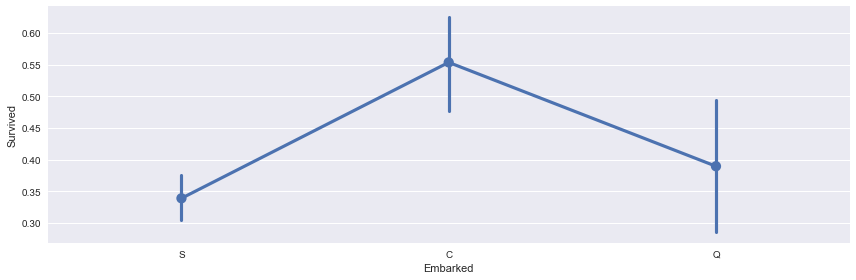

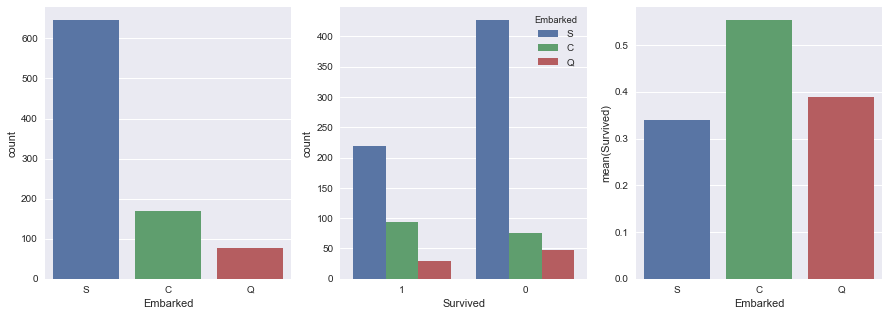

In [28]:
# Lets take a look at Port of Emarkment and survial

# Passengers that embarked at Cherbourg, France had the highest survival rate
# The most number of passengers embarked at Southampton, England, but had
# the lowest survival rate

sns.factorplot('Embarked','Survived', data=train_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [29]:
# To use port of embarkment in correlating survival with other variables
# we will convert port of embarkment to numerical values

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 3, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,3,1,2,0
1,1,1,1,38.0,71.2833,1,3,2,0
2,1,3,1,26.0,7.9250,3,2,1,1
3,1,1,1,35.0,53.1000,3,3,2,0
4,0,3,0,35.0,8.0500,3,1,1,1


In [31]:
# Looking at the data at this point
# we now need to address the missing information
# in the age column

train_df.count()

Survived      891
Pclass        891
Sex           891
Age           714
Fare          891
Embarked      891
Title         891
FamilySize    891
IsAlone       891
dtype: int64

In [32]:
# Lets look at the average age of each title

train_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()    

,Title,Age
0,1,32.630597
1,2,21.845638
2,3,35.873874
3,4,4.574167
4,5,42.875000


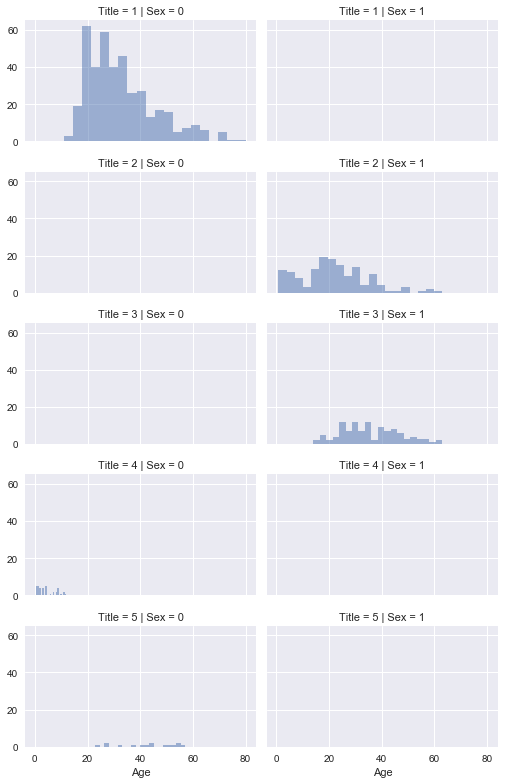

In [33]:
# Lets look at age, title and sex

# grid = sns.FacetGrid(train_df, col='Title', hue='Gender')

grid = sns.FacetGrid(train_df, row='Title', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()